<a href="https://colab.research.google.com/github/shivansh9770/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### **Importing important libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### **Mounting Drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# to read excel file install xlrd libraries
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing data as data_df

In [8]:
#Read excel file from drive
data_df=pd.read_excel('/content/drive/MyDrive/CAPSTONE PROJECT CLASSIFICATION/default of credit card clients.xls', header =1)

In [9]:
#checking all columns by name
data_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Dataset
There are 25 variables in the dataset. They are:

* ID: ID of each client
*LIMIT_BAL: Amount of given credit in NT dollars :it includes both the individual consumer credit and his/her family (supplementary) credit.
*SEX: Gender (1=male, 2=female)
*EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)
*MARRIAGE: Marital status (1=married, 2=single, 3=others)
*AGE: Age in years
*PAY_0: Repayment status in September, 2005 (-2=already paid,-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
*PAY_2: Repayment status in August, 2005 (scale same as above)
*PAY_3: Repayment status in July, 2005 (scale same as above)
*PAY_4: Repayment status in June, 2005 (scale same as above)
*PAY_5: Repayment status in May, 2005 (scale same as above)
*PAY_6: Repayment status in April, 2005 (scale same as above)
*BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*PAY_AMT1: Amount of payment in September, 2005 (NT dollar)
*PAY_AMT2: Amount of payment in August, 2005 (NT dollar)
*PAY_AMT3: Amount of payment in July, 2005 (NT dollar)
*PAY_AMT4: Amount of payment in June, 2005 (NT dollar)
*PAY_AMT5: Amount of payment in May, 2005 (NT dollar)
*PAY_AMT6: Amount of payment in April, 2005 (NT dollar)
*default payment next month: The target variable indicating default of payment (1=default, 0=non-default)

### Exploring data in data_df

In [10]:
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
data_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [12]:
#evaluate no of rows and columns
print('NO of rows = '+ str(data_df.shape[0]))
print('NO of columns = '+ str(data_df.shape[1]))

NO of rows = 30000
NO of columns = 25


In [13]:
#checking nan values
data_df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

We can see there is no null values present

In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [15]:
#describing data_df
data_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [16]:
#renaming column name 'default payment next month' to 'DEFAULT_PAY'
data_df.rename(columns={'default payment next month':'DEFAULT_PAY'},inplace = True)
data_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAY'],
      dtype='object')

**Class Imbalance ????** 

In [17]:
#check if there is any duplicate IDs
data_df.duplicated(subset = 'ID',keep = 'first').sum()

0

There are no duplicate values

In [18]:
#seeing value count of LIMIT_BAL
data_df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

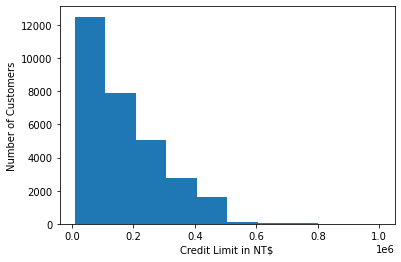

In [19]:
#plot histogram to view the distribution of credit limit
plt.hist(data_df["LIMIT_BAL"])
plt.xlabel('Credit Limit in NT$')
plt.ylabel('Number of Customers')
plt.show()

In [20]:
#check sex column 1: male, 2: female
data_df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [21]:
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [22]:
#seeing value count of EDUCATION
data_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

EDUCATION column has total 7 values (0 to 6) but in the given dataset description it should be ( 1 to 4) values so we combine 0 , 5 & 6 with 4 which is in 'other'

In [23]:
# Change values 4, 5, 6 to 0
# 1=graduate school, 2=university, 3=high school, 0=others
data_df["EDUCATION"] = data_df["EDUCATION"].replace({0:4,5:4,6:4})
data_df["EDUCATION"].value_counts()


2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [24]:
#seeing value count of MARRIAGE
data_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

MARRIAGE column has four values (0 to 3) but in the given dataset description  we should have only three values (1,2,3) so we combine 0 with 3 which is in 'other'

In [25]:
data_df['MARRIAGE'] = data_df['MARRIAGE'].replace({0:3})
data_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [26]:
#seeing value count of AGE
data_df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [27]:
#seeing value count of PAY_0
data_df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [28]:
#seeing value count of PAY_2
data_df['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [29]:
#seeing value count of PAY_3
data_df['PAY_3'].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [30]:
#seeing value count of PAY_4
data_df['PAY_4'].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

In [31]:
#seeing value count of PAY_5
data_df['PAY_5'].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

In [32]:
#seeing value count of PAY_6
data_df['PAY_6'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

##Lets see distribution of data in Credit Card Default Dataset

---



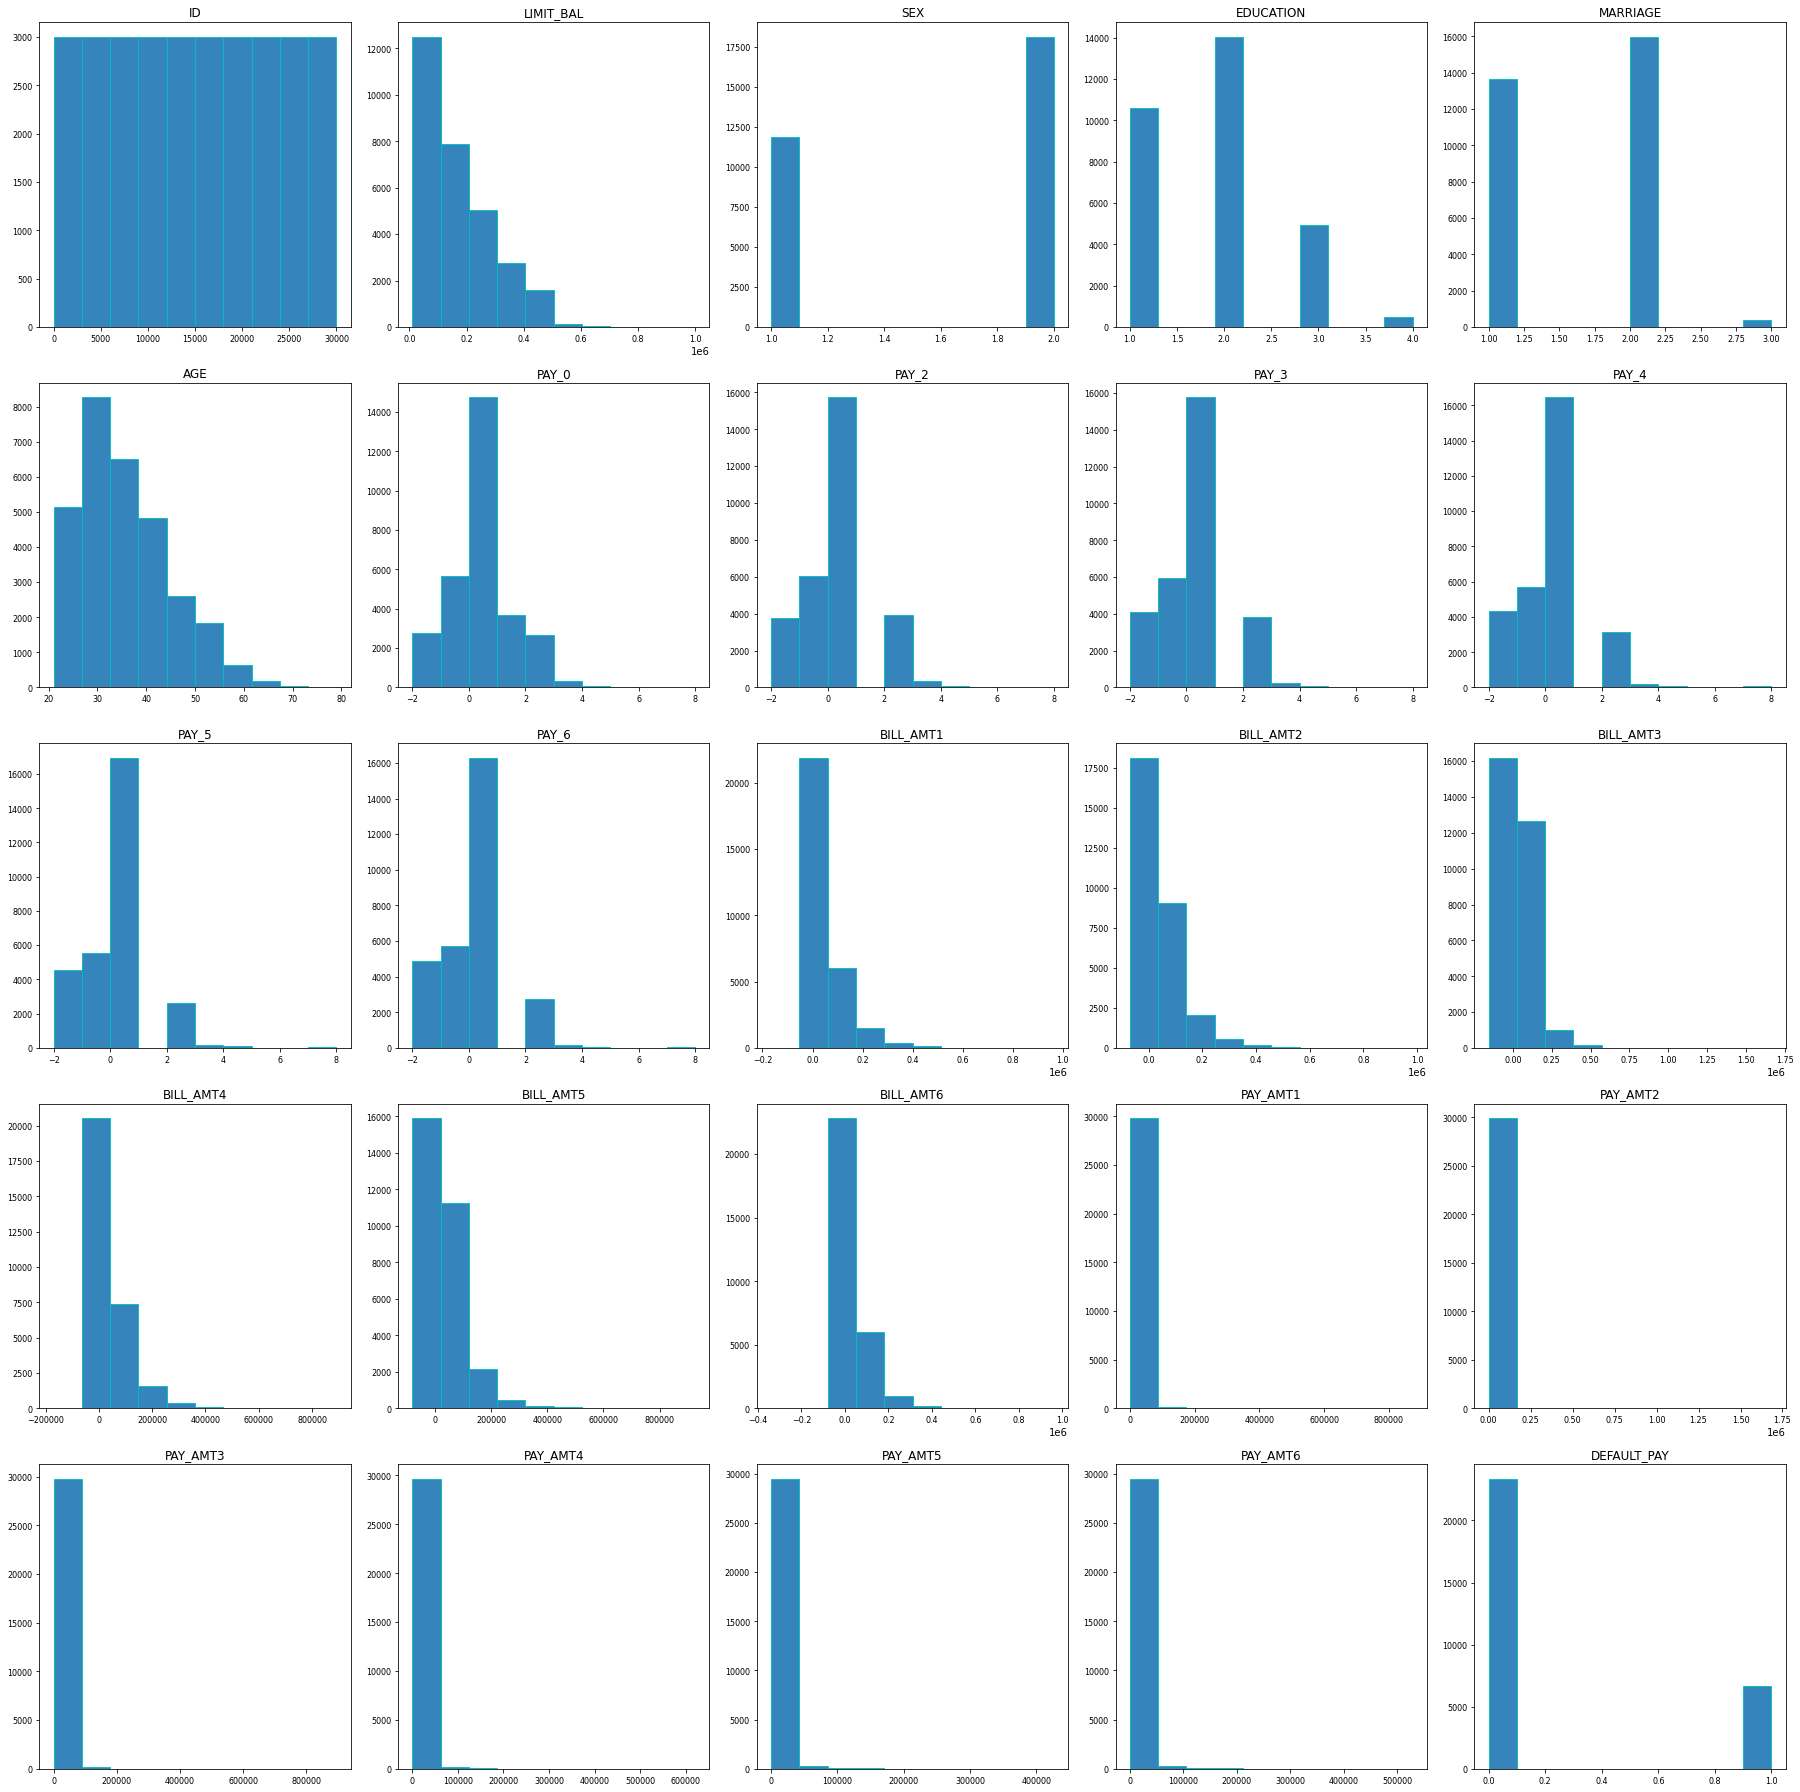

In [33]:
# histogram for data distribution
data_df.hist(figsize=(25,25), bins=10, ec="c", xlabelsize=8, ylabelsize=8, alpha=.9, grid=False)
plt.tight_layout()
plt.show()

**Creating copy of dataset having numerical values in string(what it representing) format for better visualization and analysis**

In [34]:
# copy and conversion 
df = data_df.copy()
df['SEX'] = df["SEX"].replace({1:'Male',2:'Female'})
df['EDUCATION'] = df['EDUCATION'].replace({1:'Graduate School',2:'University',3:'High School',4:'Other'})
df['MARRIAGE'] = df['MARRIAGE'].replace({1:'Married',2:'Single',3:'Other'})
df['DEFAULT_PAY'] = df['DEFAULT_PAY'].replace({1:'Default',0:'Non-default'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Default
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Default
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,Non-default
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,Non-default
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,Non-default


In [35]:
#columns in copied dataframe
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAY'],
      dtype='object')

**Visaualizing data and seeing trends**

Distribution by gender

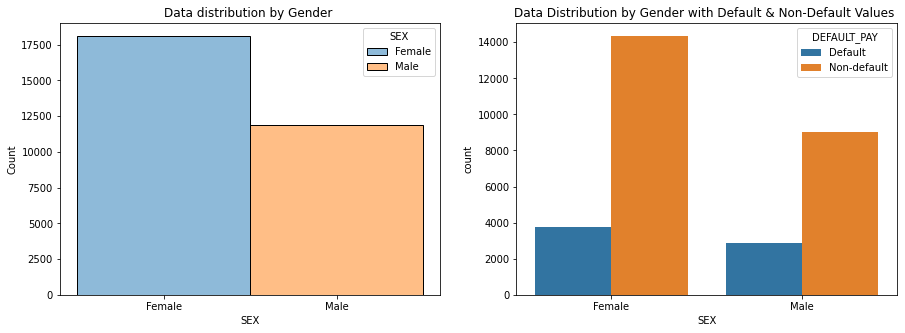

In [36]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
#This graph represtent the distribution of Gender
sns.histplot(x="SEX",ax=axs[0],hue='SEX', data=df).set(title='Data distribution by Gender ')
#This graph represtent the number of default and non-default values
sns.countplot(x="SEX", hue="DEFAULT_PAY",ax=axs[1], data=df).set(title='Data Distribution by Gender with Default & Non-Default Values ')
plt.show()

* The first graph represents genderdistribution so we can see there are more female credit card holders than male. 
* In the second graph we could see that probability of defaulting by male is more than by female.

Distribution by level of education

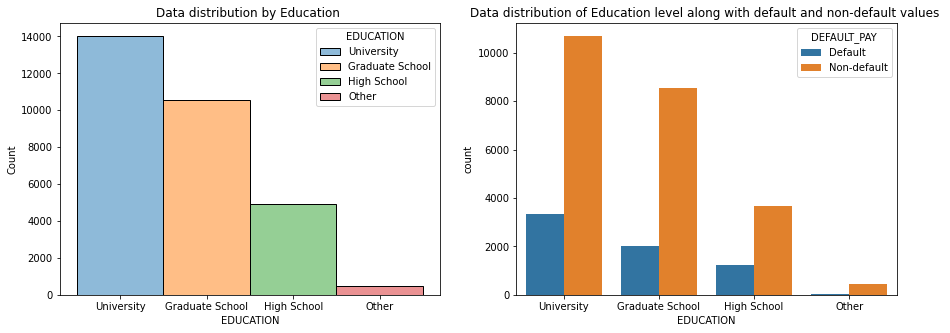

In [37]:
#figured some graphs
fig,axs = plt.subplots(1,2 , figsize=(15,5))
# This graph represent the distribution of Education 
sns.histplot(x="EDUCATION",ax=axs[0],hue='EDUCATION', data=df).set(title='Data distribution by Education ')
#This graph represents the distribution of Qualification level as well as the number of defaulters and non-defaulters
sns.countplot(x="EDUCATION", hue="DEFAULT_PAY",ax=axs[1], data=df).set(title='Data distribution of Education level along with default and non-default values ')
plt.show()



*   we could see count of university graduates is maximum and others is minimum.



Distribution Marriage status wise 

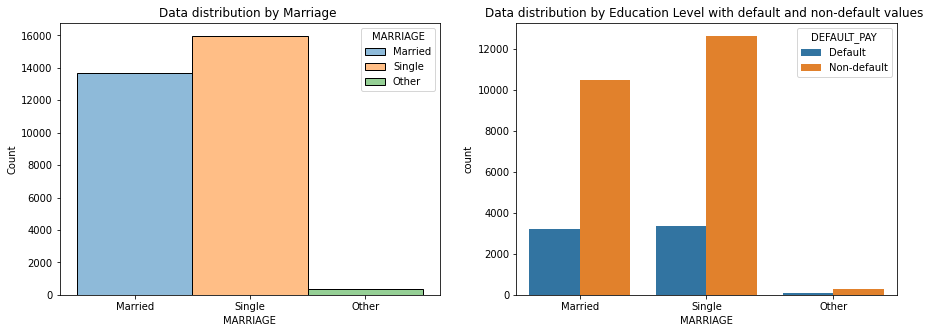

In [38]:
# This both Graph represrnt the marriage wise distribution of data and also seen the defaulte and non defaulte values according to Marriage statuw
fig,axs = plt.subplots(1,2 , figsize=(15,5))
sns.histplot(x="MARRIAGE",ax=axs[0],hue="MARRIAGE",data=df).set(title='Data distribution by Marriage ')
sns.countplot(x="MARRIAGE", hue="DEFAULT_PAY",ax=axs[1], data=df).set(title='Data distribution by Education Level with default and non-default values ')
plt.show()



*   We could see maximum card holders are single
*   we could see married people are more prone to default then single



Distribution by Age and Sex

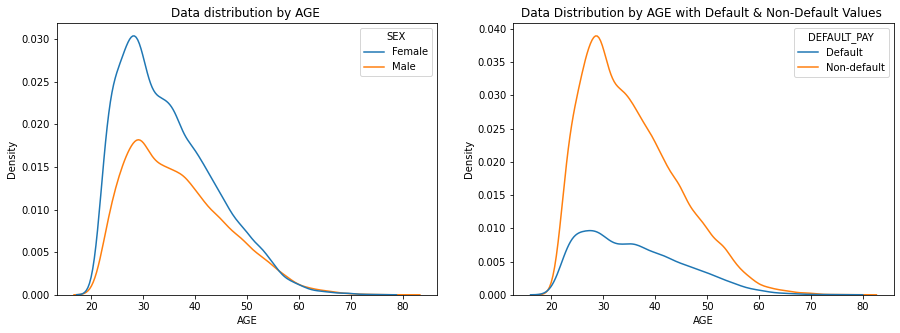

In [39]:
fig,axs = plt.subplots(1,2 , figsize=(15,5))
#This graph represents the age group along with the gender
sns.kdeplot(x="AGE",ax=axs[0],hue='SEX', data=df).set(title='Data distribution by AGE ')
#Thes graph represent the default and non default along with age
sns.kdeplot(x="AGE", hue="DEFAULT_PAY",ax=axs[1], data=df).set(title='Data Distribution by AGE with Default & Non-Default Values ')
plt.show()

*  Maximum no of card holders lie betwee age 20-35.
*  Card Holder with age 20-35 are more prone to default.



Distribution of features with default and not default

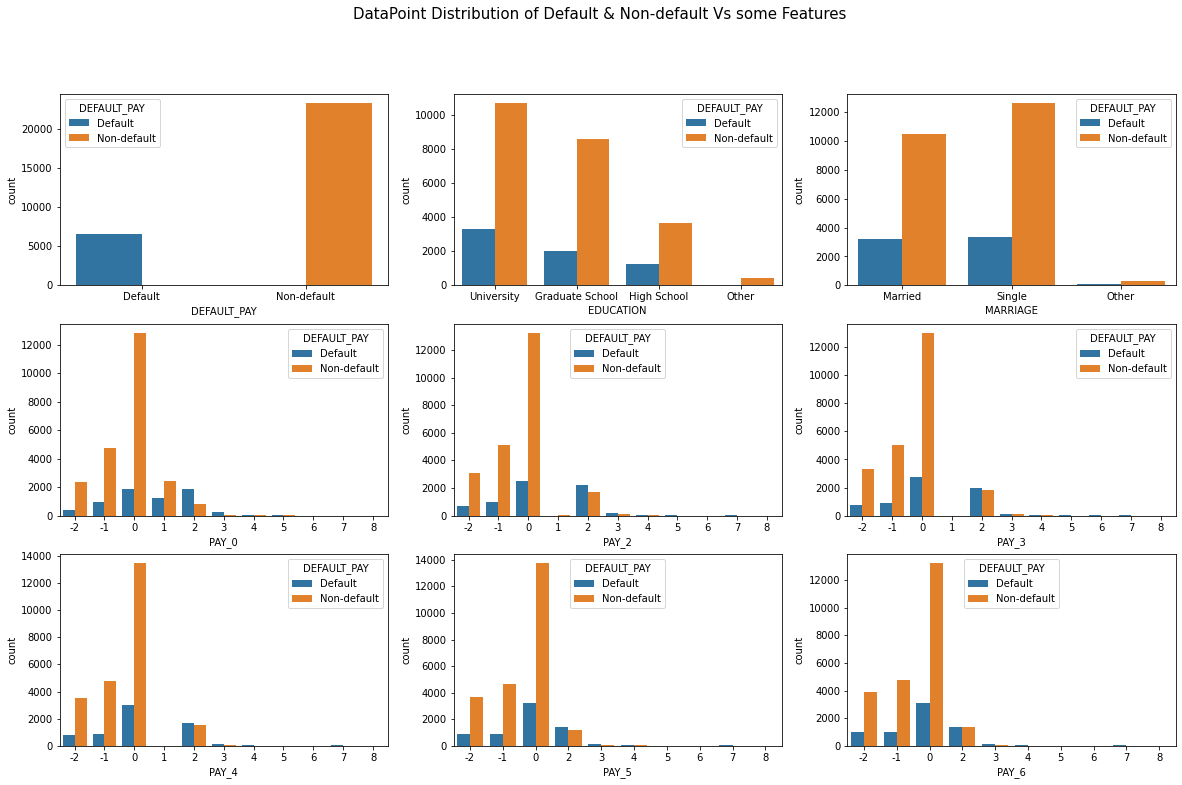

In [40]:
pay_df=df[['DEFAULT_PAY','EDUCATION','MARRIAGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
fig, axes = plt.subplots(3,3, figsize=(20, 12))
fig.suptitle('DataPoint Distribution of Default & Non-default Vs some Features', size=15)
for i,col in enumerate(pay_df):
  sns.countplot(x=col,hue="DEFAULT_PAY",data=pay_df, ax=axes[i//3,i%3])

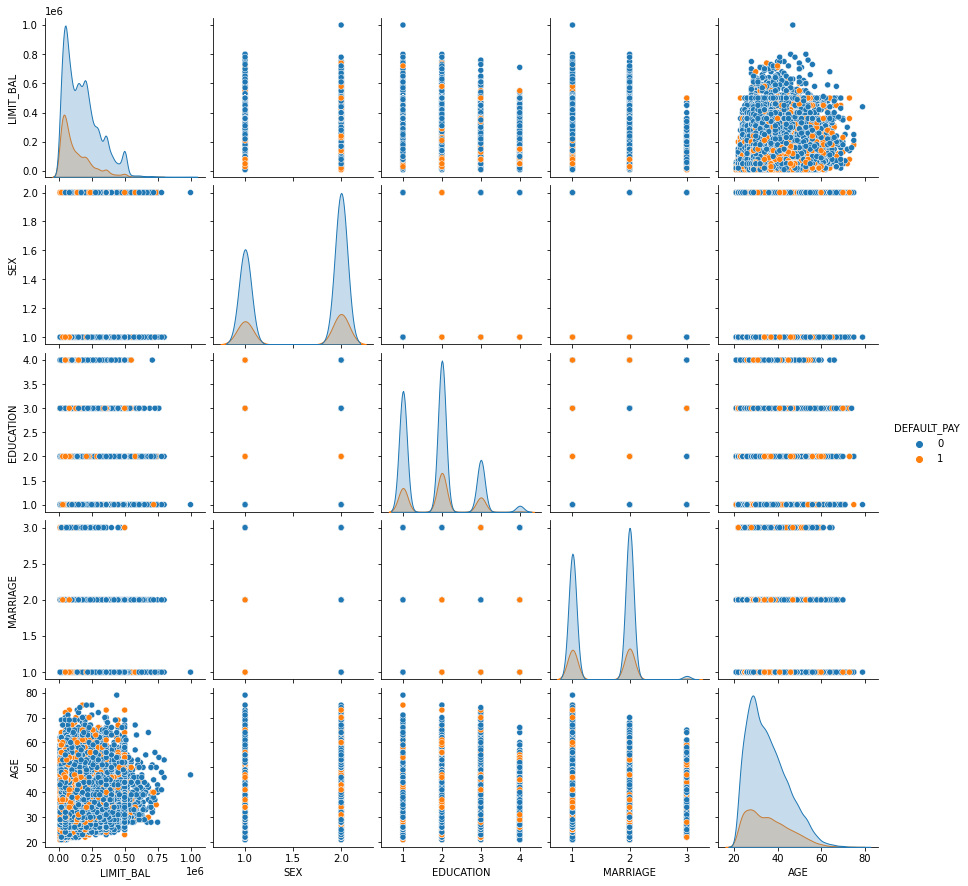

In [41]:
# default and non default with respect to features
sns.pairplot(data_df, hue = 'DEFAULT_PAY', vars = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'] )

Above Blue colour representing Not default and orange representing default.

## Let's see the outliers in our Datasets

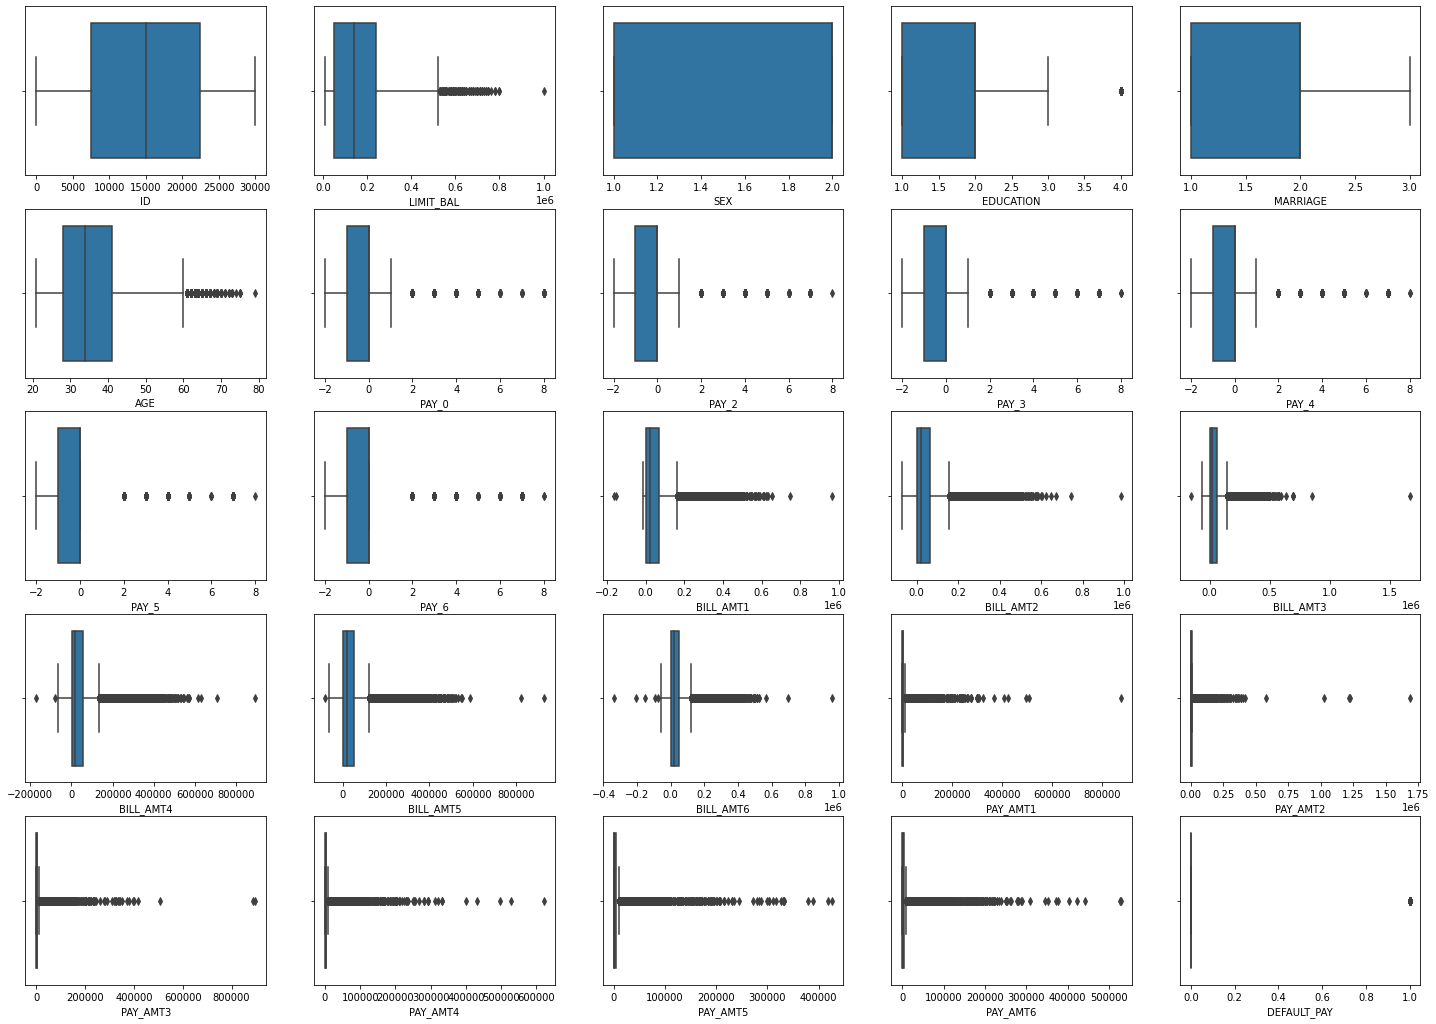

In [42]:
# looking for outliers using box plot
plt.figure(figsize=(25,18))
for index,item in enumerate([i for i in data_df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(data_df[item])
print('\n')


We cant see any outlier worth removing

##Let's see Correlation Heatmap of our dataframe

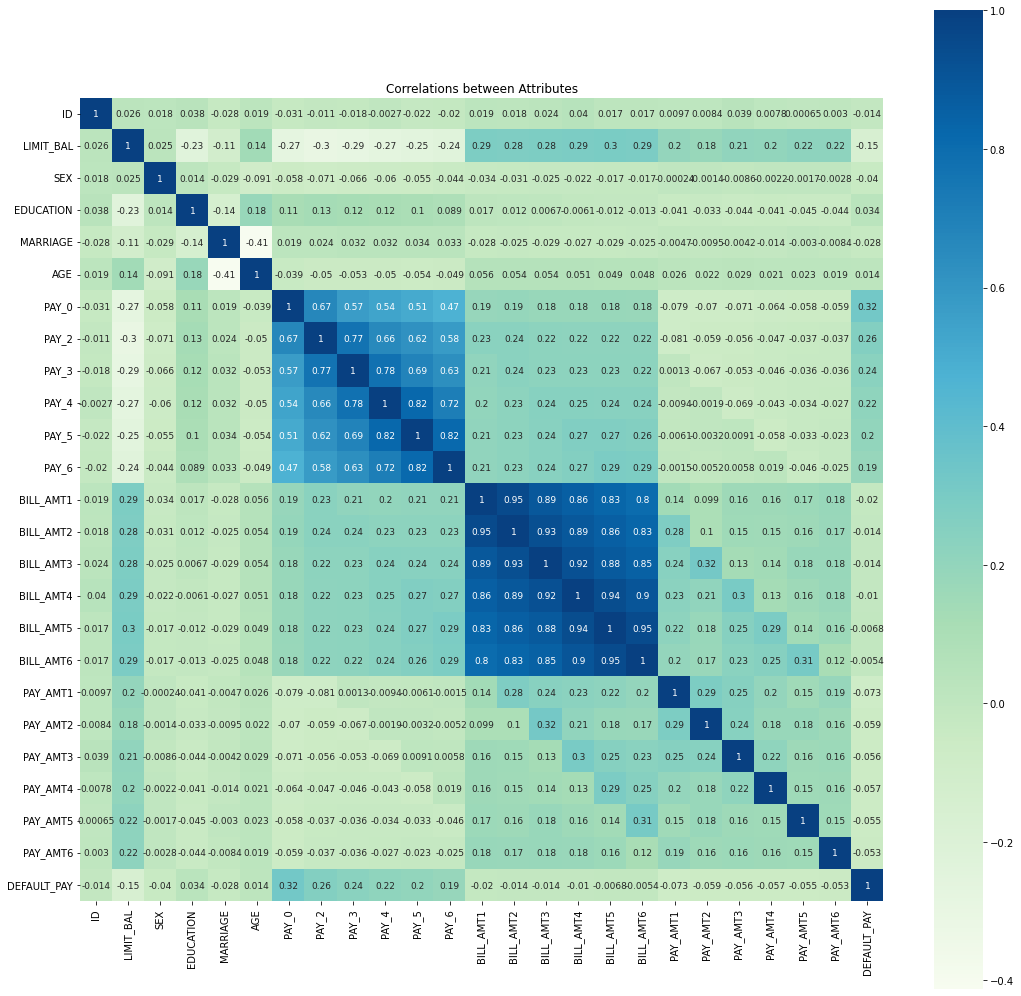

In [43]:
#let's see the correlation btw features and target variable by plotting heatmap
fig = plt.subplots (figsize = (18, 18))
sns.heatmap(data_df.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 9})
plt.title('Correlations between Attributes')
plt.show ()

**Feature Engineering**

Feature engineering for each month **(Bill-Payment)**

We have **bill amount** and **pay amount** from april to september so let us make columns having **remaining payment** (unpaid amount) for **each month**. 

In [44]:
# creating list of months_pending. 
months_pending=['april_pending','may_pending','june_pending','july_pending','august_pending','september_pending']
# This will store the pending amount after paying bill.  

In [45]:
#Created pending columns month wise
for i,month in enumerate(months_pending): 
 print(i,month)
 data_df[month]=data_df['BILL_AMT'+str(6-i)]-data_df['PAY_AMT'+str(6-i)]

0 april_pending
1 may_pending
2 june_pending
3 july_pending
4 august_pending
5 september_pending


In [46]:
# updated data frame is
data_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY,april_pending,may_pending,june_pending,july_pending,august_pending,september_pending
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,0,0,0,689,2413,3913
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,1261,3455,2272,1682,725,2682
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,10549,13948,13331,12559,12527,27721
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,28547,27890,27214,48091,46214,44990
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,18452,18457,11940,25835,-31011,6617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,3047,5000,1000,0,14980,26237,84957,203362,172815,180448
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,129,0,0,0,0,5190,8850,-5496,-1698,-154
29997,29998,30000,1,2,2,37,4,3,2,-1,...,4200,2000,3100,1,16257,18582,16678,-19242,3356,3565
29998,29999,80000,1,3,1,41,1,-1,0,0,...,1926,52964,1804,1,47140,-41109,50848,75126,74970,-87545


Now we can remove **Bill_AMT** and **PAY_AMT** columns as they are **redundent**

In [47]:
#Droping all redundent columns 
for i in range(6):
  data_df.drop(columns=['BILL_AMT'+str(6-i),'PAY_AMT'+str(6-i)],inplace=True)

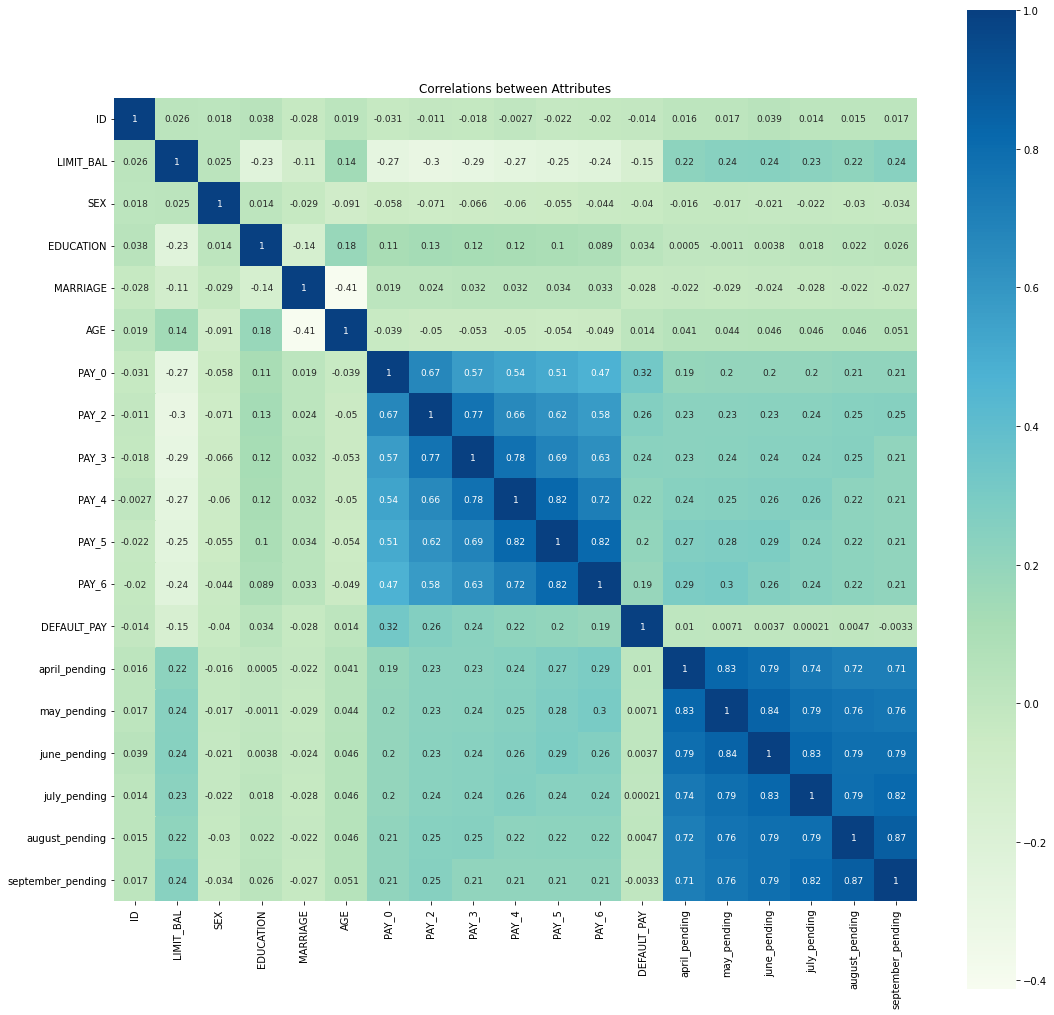

In [48]:
#let's see correlation btw features in updated data frame
fig = plt.subplots (figsize = (18, 18))
sns.heatmap(data_df.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 9})
plt.title('Correlations between Attributes')
plt.show ()

Lets see out **Target Variable**

In [49]:
data_df['DEFAULT_PAY'].value_counts()

0    23364
1     6636
Name: DEFAULT_PAY, dtype: int64

We can see there is **class Imbalance** **0** count is way **more** than **1** count. It could lead to bias in prediction

We will **train** our model with **imbalanced** class as well as after **balancing** class. 

In [50]:
# storing dependent variable in y and  independent variables in x
x=data_df.drop(columns='DEFAULT_PAY')
y=data_df['DEFAULT_PAY']

In [51]:
# using smote oversamling for balancing classes
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', len(data_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [52]:
 x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,april_pending,may_pending,june_pending,july_pending,august_pending,september_pending
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,0,0,0,689,2413,3913
1,2,120000,2,2,2,26,-1,2,0,0,0,2,1261,3455,2272,1682,725,2682
2,3,90000,2,2,2,34,0,0,0,0,0,0,10549,13948,13331,12559,12527,27721
3,4,50000,2,2,1,37,0,0,0,0,0,0,28547,27890,27214,48091,46214,44990
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,18452,18457,11940,25835,-31011,6617


In [53]:
# important libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

**Splitting** the original data for train and test in 4:1.

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.2, random_state =14)

In [55]:
# transforming data
transform=MinMaxScaler()
x_train=transform.fit_transform(x_train)
x_test=transform.transform(x_test)

**Lets Implement Models**

**Implementing KNN** before balancing

In [66]:
# implementing KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,f1_score


classifier = KNeighborsClassifier()



In [57]:
# Hyper parameter Tunning using GridSearchCV
k_range =[2,4,5,7,9,13,15,18]
param_grid = dict(n_neighbors=k_range)
gridCV = GridSearchCV(classifier, param_grid, cv=4, scoring='accuracy', return_train_score=True,verbose=1)

In [58]:
gridCV.fit(x_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 5, 7, 9, 13, 15, 18]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [68]:
#best parameters
print(gridCV.best_params_)

{'n_neighbors': 15}


In [69]:
accuracy = gridCV.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 80.65%


In [70]:
y_predict=gridCV.predict(x_test)

In [71]:
test_accuracy=accuracy_score(y_test,y_predict)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 80.05%


In [72]:
print('ROCAUC score:',roc_auc_score(y_test, y_predict))

ROCAUC score: 0.618650577022273


In [73]:
print('F1 Score: %.3f' % f1_score(y_test, y_predict))

F1 Score: 0.394


In [74]:
#confusion Matrix
confusion_matrix(y_predict, y_test)

array([[4414,  993],
       [ 204,  389]])

**Confusion matrix for train and test data**

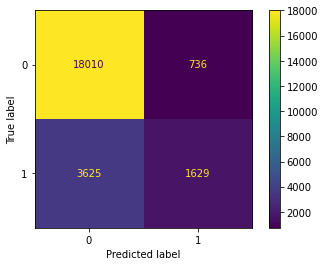

In [75]:
plot_confusion_matrix(gridCV,x_train, y_train,values_format='d' )

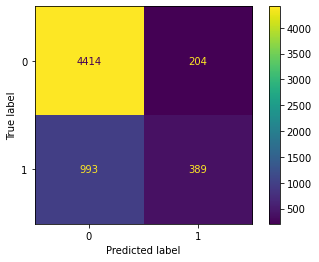

In [76]:
plot_confusion_matrix(gridCV,x_test, y_test )

Plotting ROC_AUC

In [77]:
from sklearn.metrics import roc_curve,auc

In [78]:
model_fpr,model_tpr,threshold=roc_curve(y_test,y_predict)
area_under_curve=auc(model_fpr,model_tpr)

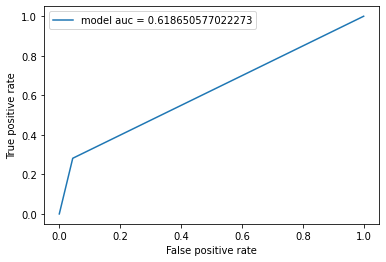

In [80]:
plt.plot(model_fpr,model_tpr,linestyle='-',label='model auc = '+str(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

**KNN model with Balanced data**

In [81]:
# splitting train and test data after balancing
x_train_balanced,x_test_balanced,y_train_balanced,y_test_balanced=train_test_split(x_smote,y_smote, test_size = 0.2, random_state =14)

In [82]:
transform=MinMaxScaler()
x_train_balanced=transform.fit_transform(x_train_balanced)
x_test_balanced=transform.transform(x_test_balanced)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
from sklearn.preprocessing import MinMaxScaler

In [84]:
k_range =[13,15,18,20,25]
param_grid = dict(n_neighbors=k_range)
gridCV = GridSearchCV(classifier, param_grid, cv=4, scoring='accuracy', return_train_score=True,verbose=1)

In [85]:
gridCV.fit(x_train_balanced, y_train_balanced)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [13, 15, 18, 20, 25]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [86]:
y_predict_balanced=gridCV.predict(x_test_balanced)

In [87]:
accuracy = gridCV.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 73.36%


In [88]:
test_accuracy=accuracy_score(y_test_balanced,y_predict_balanced)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 72.82%


In [89]:
print('ROCAUC score:',roc_auc_score(y_test_balanced, y_predict_balanced))

ROCAUC score: 0.7284966901250768


In [90]:
print('Precision: %.3f' % precision_score(y_test_balanced, y_predict_balanced))

Precision: 0.746


In [91]:
print('Recall: %.3f' % recall_score(y_test_balanced, y_predict_balanced))

Recall: 0.701


In [92]:
print('F1 Score: %.3f' % f1_score(y_test_balanced, y_predict_balanced))

F1 Score: 0.723


In [93]:
model_fpr,model_tpr,threshold=roc_curve(y_test_balanced,y_predict_balanced)
area_under_curve=auc(model_fpr,model_tpr)

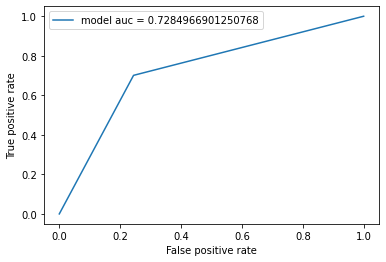

In [94]:
plt.plot(model_fpr,model_tpr,linestyle='-',label='model auc = '+str(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

**Implementing XGBoost** **before balancing** 

In [95]:
import xgboost as xgb

In [96]:
classifier=xgb.XGBClassifier()

In [97]:
params = {
  "learning_rate" : [0.05,0.10,0.20,0.30,0.50,0.70,0.90,1,5,10],
  "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15]
}

In [98]:
RandomXGB=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=4,verbose=3,random_state=3)

In [99]:
RandomXGB.fit(x_train,y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV 1/4] END .....learning_rate=1, max_depth=10;, score=0.713 total time=   5.5s
[CV 2/4] END .....learning_rate=1, max_depth=10;, score=0.729 total time=   5.3s
[CV 3/4] END .....learning_rate=1, max_depth=10;, score=0.712 total time=   5.4s
[CV 4/4] END .....learning_rate=1, max_depth=10;, score=0.726 total time=   5.3s
[CV 1/4] END ......learning_rate=1, max_depth=4;, score=0.713 total time=   2.0s
[CV 2/4] END ......learning_rate=1, max_depth=4;, score=0.722 total time=   2.0s
[CV 3/4] END ......learning_rate=1, max_depth=4;, score=0.728 total time=   2.0s
[CV 4/4] END ......learning_rate=1, max_depth=4;, score=0.736 total time=   2.0s
[CV 1/4] END ....learning_rate=10, max_depth=10;, score=0.659 total time=   0.8s
[CV 2/4] END ....learning_rate=10, max_depth=10;, score=0.500 total time=   0.7s
[CV 3/4] END ....learning_rate=10, max_depth=10;, score=0.500 total time=   0.8s
[CV 4/4] END ....learning_rate=10, max_depth=10;,

RandomizedSearchCV(cv=4, estimator=XGBClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.5, 0.7, 0.9, 1, 5,
                                                          10],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15]},
                   random_state=3, scoring='roc_auc', verbose=3)

In [100]:
y_predict=RandomXGB.predict(x_test)

In [101]:
accuracy = RandomXGB.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 76.97%


In [102]:
test_accuracy=accuracy_score(y_test,y_predict)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 81.22%


In [103]:
print('ROCAUC score:',roc_auc_score(y_test, y_predict))


ROCAUC score: 0.6556382280624674


In [104]:
confusion_matrix(y_predict, y_test)

array([[4368,  877],
       [ 250,  505]])

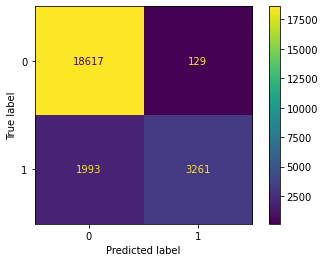

In [105]:
plot_confusion_matrix(RandomXGB,x_train, y_train )

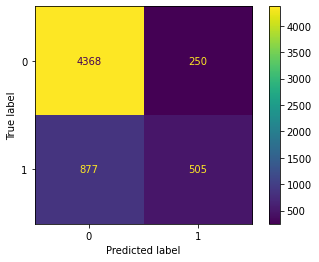

In [106]:
plot_confusion_matrix(RandomXGB,x_test, y_test)

**XGboost with class balanced**

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote, test_size = 0.2, random_state =14)

In [108]:
classifier=xgb.XGBClassifier()

In [109]:
RandomXGB=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=4,verbose=3,random_state=3)

In [110]:
RandomXGB.fit(x_train,y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV 1/4] END .....learning_rate=1, max_depth=10;, score=0.904 total time=   9.5s
[CV 2/4] END .....learning_rate=1, max_depth=10;, score=0.899 total time=   9.4s
[CV 3/4] END .....learning_rate=1, max_depth=10;, score=0.897 total time=   9.5s
[CV 4/4] END .....learning_rate=1, max_depth=10;, score=0.894 total time=   9.3s
[CV 1/4] END ......learning_rate=1, max_depth=4;, score=0.879 total time=   3.5s
[CV 2/4] END ......learning_rate=1, max_depth=4;, score=0.877 total time=   3.6s
[CV 3/4] END ......learning_rate=1, max_depth=4;, score=0.872 total time=   3.5s
[CV 4/4] END ......learning_rate=1, max_depth=4;, score=0.865 total time=   3.6s
[CV 1/4] END ....learning_rate=10, max_depth=10;, score=0.500 total time=   1.3s
[CV 2/4] END ....learning_rate=10, max_depth=10;, score=0.500 total time=   2.1s
[CV 3/4] END ....learning_rate=10, max_depth=10;, score=0.500 total time=   2.1s
[CV 4/4] END ....learning_rate=10, max_depth=10;,

RandomizedSearchCV(cv=4, estimator=XGBClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.5, 0.7, 0.9, 1, 5,
                                                          10],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15]},
                   random_state=3, scoring='roc_auc', verbose=3)

In [111]:
y_predict=RandomXGB.predict(x_test)

In [112]:
y_train_predict=RandomXGB.predict(x_train)

In [113]:
train_accuracy=accuracy_score(y_train,y_train_predict)*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(train_accuracy) )

Accuracy for our training dataset with tuning is : 99.96%


In [114]:
test_accuracy=accuracy_score(y_test,y_predict)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 83.50%


In [115]:
print('Precision: %.3f' % precision_score(y_test, y_predict))

Precision: 0.850


In [116]:
print('Recall: %.3f' % recall_score(y_test, y_predict))

Recall: 0.818


In [117]:
print('F1 Score: %.3f' % f1_score(y_test, y_predict))

F1 Score: 0.834


In [118]:
print('ROCAUC score:',roc_auc_score(y_test, y_predict))

ROCAUC score: 0.8351769259484843


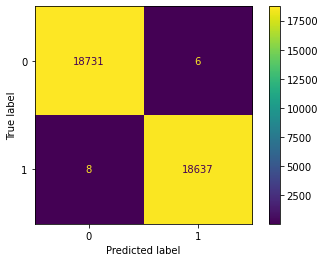

In [119]:
plot_confusion_matrix(RandomXGB,x_train, y_train )

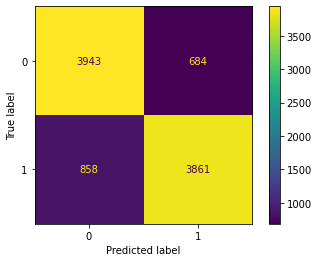

In [120]:
plot_confusion_matrix(RandomXGB,x_test, y_test)

In [121]:
from sklearn.metrics import roc_curve,auc

In [122]:
model_fpr,model_tpr,threshold=roc_curve(y_test,y_predict)
area_under_curve=auc(model_fpr,model_tpr)

In [123]:
print(threshold)

[2 1 0]


In [124]:
area_under_curve

0.8351769259484843

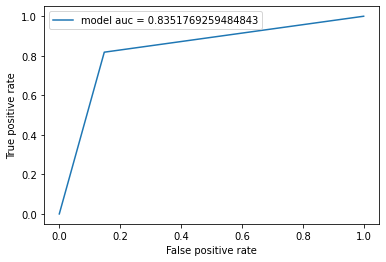

In [125]:
plt.plot(model_fpr,model_tpr,linestyle='-',label='model auc = '+str(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

**Implement logistic Regression** before balancing class

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.2, random_state =14)

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
LR=LogisticRegression()

In [129]:
param_grid = [    
    {'penalty' : ['l1', 'l2','none'],
    'max_iter' : [500, 1000,1500]
    }
]

In [130]:
LR = GridSearchCV(LR, param_grid = param_grid, cv = 4, verbose=True)

In [131]:
LR.fit(x_train,y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid=[{'max_iter': [500, 1000, 1500],
                          'penalty': ['l1', 'l2', 'none']}],
             verbose=True)

In [132]:
y_predict=LR.predict(x_test)

In [133]:
test_accuracy=accuracy_score(y_test,y_predict)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 76.97%


In [134]:
print('ROCAUC score:',roc_auc_score(y_test, y_predict))

ROCAUC score: 0.5


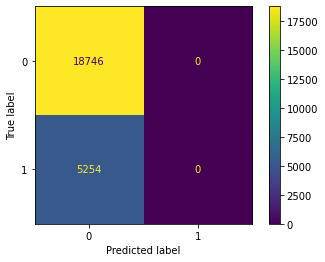

In [135]:
plot_confusion_matrix(LR,x_train, y_train )

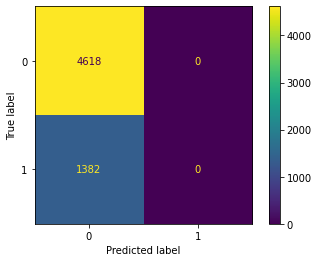

In [136]:
plot_confusion_matrix(LR,x_test, y_test)

In [137]:
model_fpr,model_tpr,threshold=roc_curve(y_test,y_predict)
area_under_curve=auc(model_fpr,model_tpr)

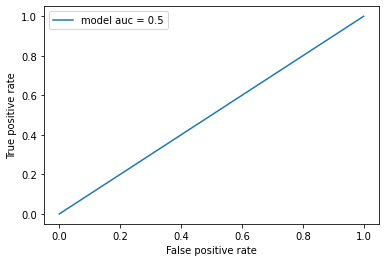

In [138]:
plt.plot(model_fpr,model_tpr,linestyle='-',label='model auc = '+str(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

**Logistic Regression after Balancing class**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_smote, y_smote, test_size = 0.2, random_state =14)

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
LR=LogisticRegression()

In [144]:
param_grid = [    
    {'penalty' : ['l1', 'l2','none'],
    'max_iter' : [500, 1000,1500]
    }
]

In [145]:
LR = GridSearchCV(LR, param_grid = param_grid, cv = 4, verbose=True)

In [146]:
LR.fit(x_test,y_test)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid=[{'max_iter': [500, 1000, 1500],
                          'penalty': ['l1', 'l2', 'none']}],
             verbose=True)

In [147]:
y_train_predict=LR.predict(x_train)

In [148]:
y_predict=LR.predict(x_test)

In [149]:
train_accuracy=accuracy_score(y_train,y_train_predict)*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(train_accuracy) )

Accuracy for our training dataset with tuning is : 59.29%


In [150]:
test_accuracy=accuracy_score(y_test,y_predict)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 59.53%


In [151]:
print('Precision: %.3f' % precision_score(y_test, y_predict))

Precision: 0.581


In [152]:
print('Recall: %.3f' % recall_score(y_test, y_predict))

Recall: 0.714


In [153]:
print('F1 Score: %.3f' % f1_score(y_test, y_predict))

F1 Score: 0.640


In [154]:
print('ROCAUC score:',roc_auc_score(y_test, y_predict))

ROCAUC score: 0.5941580539297497


In [155]:
model_fpr,model_tpr,threshold=roc_curve(y_test,y_predict)
area_under_curve=auc(model_fpr,model_tpr)

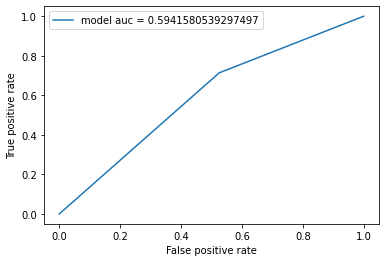

In [156]:
plt.plot(model_fpr,model_tpr,linestyle='-',label='model auc = '+str(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

# **SVM** balanced class

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote, test_size = 0.2, random_state =14)

In [158]:
# "Support vector classifier" 
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=0) 

In [159]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}
 

In [160]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)

In [ ]:
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.5min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.5min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.6min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.5min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.5min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.5min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.5min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.5min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.5min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.5min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.5min
[CV] END ......................C=0.1, gamma=0.01,

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

In [ ]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
y_predict = grid.predict(x_test)

In [ ]:
y_train_predict=grid.predict(x_train)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# print classification report
print(classification_report(y_test, y_predict))

In [ ]:
train_accuracy=accuracy_score(y_train,y_train_predict)*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(train_accuracy) )

In [ ]:
test_accuracy=accuracy_score(y_test,y_predict)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_predict))

In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_predict))

In [ ]:
print('F1 Score: %.3f' % f1_score(y_test, y_predict))

In [ ]:
print('ROCAUC score:',roc_auc_score(y_test, y_predict))

In [ ]:
plot_confusion_matrix(grid,x_train, y_train )

In [ ]:
plot_confusion_matrix(grid,x_test, y_test)

In [ ]:
model_fpr,model_tpr,threshold=roc_curve(y_test,y_predict)
area_under_curve=auc(model_fpr,model_tpr)

In [ ]:
plt.plot(model_fpr,model_tpr,linestyle='-',label='model auc = '+str(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

### **Implementing Naive Bayes** with balanced class



In [ ]:
# Import necessary modules 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


In [ ]:
#Grid Search Parameters
grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
#Hyperparameter tune using training data
nbModel = GridSearchCV(estimator=GaussianNB(), param_grid=grid_nb, verbose=5, cv=10, n_jobs=-1)
nbModel.fit(x_train, y_train)
print(nbModel.best_estimator_)

In [ ]:
#Predict on testing data
y_pred = nbModel.predict(x_test)
print(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,f1_score
print("The confusion matrix is : ", confusion_matrix(y_test, y_pred))

print( "The accuracy score is : ",accuracy_score(y_test, y_pred))

print("The precision score is : ",precision_score(y_test, y_pred))
 
print("The recall score",recall_score(y_test, y_pred))
 
print("The f1 score is : ",f1_score(y_test, y_pred))

print("The Roc_auc score is : ",roc_auc_score(y_test, y_pred))

In [ ]:
plot_confusion_matrix(nbModel,x_train, y_train )

In [ ]:
plot_confusion_matrix(nbModel,x_test,y_test)

In [ ]:
model_fpr,model_tpr,threshold=roc_curve(y_test,y_pred)
area_under_curve=auc(model_fpr,model_tpr)


In [ ]:
plt.plot(model_fpr,model_tpr,linestyle='-',label='model auc = '+str(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

**Now lets visualize precision_recall_curve and roc_curve for our models and compare**

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

In [ ]:
# Plot ROC_AUC curve of balanced class models
 
f,ax=plt.subplots(figsize=(10,5))

plot_roc_curve(gridCV, x_test, y_test,ax=ax, color="orange",label='K-Nearest Neighbor')
plot_roc_curve(LR, x_test, y_test,ax=ax, color="blue",label='Logistic Regression')
plot_roc_curve(grid, x_test, y_test,ax=ax, color="black",label='Support Vector Machine')
plot_roc_curve(RandomXGB, x_test, y_test,ax=ax, color="red",label='XGBoost')
plot_roc_curve(nbModel, x_test, y_test,ax=ax, color="purple",label='Naive Bayes')

plt.title('ROC-AUC Score of 5 models')
plt.grid()

In [ ]:
# Compare  models' Precision_recall curves

fig,ax=plt.subplots(figsize=(10,5))

plot_precision_recall_curve(gridCV, x_test, y_test,ax=ax, color="purple",label='K-Nearest Neighbor')
plot_precision_recall_curve(LR, x_test, y_test,ax=ax, color="blue",label='Logistic Regression')
plot_precision_recall_curve(grid, x_test, y_test,ax=ax, color="black",label='Support Vector Machine')
plot_precision_recall_curve(RandomXGB, x_test, y_test,ax=ax, color="red",label='XGBoost')
plot_precision_recall_curve(nbModel, x_test, y_test,ax=ax, color="green",label='Naive Bayes')

plt.title('Precision_Recall of 5 models')
plt.grid()